In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import load_model
import pickle

In [2]:
data = pd.read_csv('ADANIPORTS.csv')

In [3]:
data.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
5,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.0,1049.00,1041.45,1015.39,4849250,4.923867e+14,NaN,1537667,0.3171
6,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.0,1084.00,1082.45,1082.79,2848209,3.084010e+14,NaN,904260,0.3175
7,2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.70,1051.0,1090.10,1081.30,1087.03,1749516,1.901771e+14,NaN,825691,0.4720
8,2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.00,1078.0,1100.00,1102.40,1106.57,2247904,2.487465e+14,NaN,697763,0.3104
9,2007-12-10,MUNDRAPORT,EQ,1102.40,1110.00,1110.00,1061.1,1073.55,1075.40,1080.38,1012350,1.093727e+14,NaN,417514,0.4124


In [4]:
data.shape

(3322, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [6]:
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [7]:
data['Trades'].fillna(0, inplace=True)

C:\Users\ANUPAMA\AppData\Local\Temp\ipykernel_29212\2520972119.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trades'].fillna(0, inplace=True)


In [8]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [10]:
data.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.687719e+15,0.0,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,0.0,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,0.0,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,0.0,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,0.0,816123,0.2741
5,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.0,1049.00,1041.45,1015.39,4849250,4.923867e+14,0.0,1537667,0.3171
6,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.0,1084.00,1082.45,1082.79,2848209,3.084010e+14,0.0,904260,0.3175
7,2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.70,1051.0,1090.10,1081.30,1087.03,1749516,1.901771e+14,0.0,825691,0.4720
8,2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.00,1078.0,1100.00,1102.40,1106.57,2247904,2.487465e+14,0.0,697763,0.3104
9,2007-12-10,MUNDRAPORT,EQ,1102.40,1110.00,1110.00,1061.1,1073.55,1075.40,1080.38,1012350,1.093727e+14,0.0,417514,0.4124


In [11]:
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)

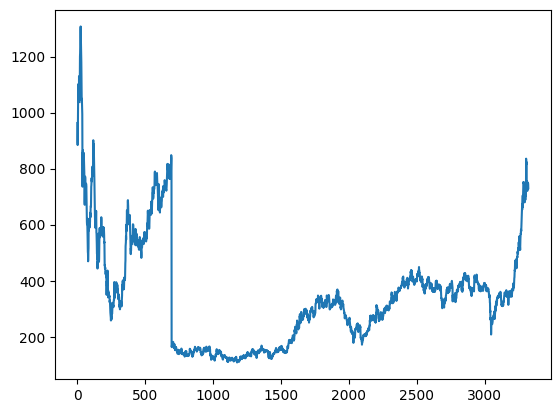

In [12]:
import matplotlib.pyplot as plt
plt.plot(close_prices)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [14]:
scaled_data

array([[0.71274334],
       [0.65521697],
       [0.64712993],
       ...,
       [0.53211889],
       [0.53253575],
       [0.5186127 ]])

In [15]:
scaled_data.shape

(3322, 1)

In [16]:
train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, : ], scaled_data[train_size: len(scaled_data), :1]

In [17]:
train_size, test_size

(2657, 665)

In [19]:

def create_dataset(dataset, step=1):
    X, y = [], []
    for i in range(len(dataset)-step-1):
        X.append(dataset[i:(i+step), 0])
        y.append(dataset[i + step, 0])
    return np.array(X), np.array(y)


sequence_length = 60
x_train, y_train = create_dataset(train_data, sequence_length)
x_test, y_test = create_dataset(test_data, sequence_length)

In [20]:
x_train.shape

(2596, 60)

In [21]:
y_train.shape

(2596,)

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

c:\Users\ANUPAMA\miniconda3\envs\bot\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, batch_size=32)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0073 - val_loss: 7.3838e-04
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0017 - val_loss: 5.7461e-04
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0013 - val_loss: 3.4081e-04
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0014 - val_loss: 6.7134e-04
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 8.4437e-04 - val_loss: 3.3712e-04
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0012 - val_loss: 3.7653e-04
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0016 - val_loss: 2.6745e-04
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 6.9486e-04 - val_loss: 2.2549e-04
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0012 - val_loss: 3.2389e-04
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 6.8775e-04 - val_loss: 3.1009e-04
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 8.4153e-04 - val_loss: 2.4178e-04
Epo

In [27]:
# Save model
model.save("model/stock_model.h5")

# Save scaler
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [28]:
train_predicted = model.predict(x_train)
test_predicted = model.predict(x_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [29]:
train_predicted_prices = scaler.inverse_transform(train_predicted)
test_predicted_prices = scaler.inverse_transform(test_predicted)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predicted_prices))

372.3745826847646

In [31]:
math.sqrt(mean_squared_error(y_test, test_predicted_prices))

425.2728122785912

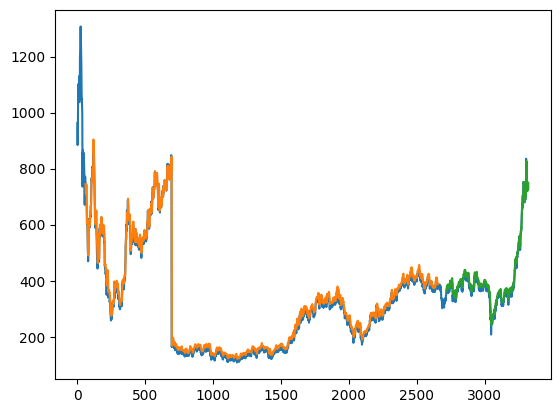

In [32]:
look_back=60
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predicted_prices)+look_back, :] = train_predicted_prices
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predicted_prices)+(look_back*2)+1:len(scaled_data)-1, :] = test_predicted_prices
# plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
